# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [26]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.utils import resample


In [11]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

C:\Users\Ema\AppData\Local\Temp\ipykernel_19572\1099342947.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette="viridis")


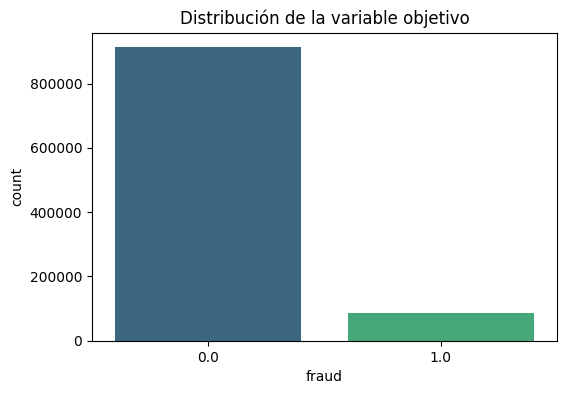

In [14]:
# **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
features = fraud.drop(columns = ['fraud'])
target = fraud['fraud']

target.value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.countplot(x=target, palette="viridis")
plt.title("Distribución de la variable objetivo")
plt.show()

In [15]:

class_distribution = target.value_counts(normalize=True)
if class_distribution.max() > 0.8:
    print("El dataset está desbalanceado.")
else:
    print("El dataset está balanceado.")


El dataset está desbalanceado.


In [19]:
# **2.** Train a LogisticRegression.
X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
log_reg.score(X_test_scaled, y_test)

0.958844

In [21]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228146
         1.0       0.89      0.60      0.72     21854

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [22]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [24]:
train['fraud'] = y_train.values

In [ ]:
fraud = train[train['fraud'] == 1]
no_fraud = train[train['fraud'] == 0]

In [27]:
yes_oversampled = resample(fraud,
                                    replace=True,
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [28]:
train_over = pd.concat([yes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
497860,-0.333827,-0.177824,1.485679,0.366097,1.361501,-0.334246,0.731384,1.0
486996,-0.388283,-0.152576,0.794644,-2.731518,-0.734483,-0.334246,0.731384,1.0
524099,-0.048406,-0.177397,1.114820,0.366097,1.361501,-0.334246,0.731384,1.0
241886,-0.273492,-0.144215,0.976226,0.366097,-0.734483,-0.334246,0.731384,1.0
480298,0.968739,0.523167,1.922104,0.366097,-0.734483,-0.334246,0.731384,1.0
...,...,...,...,...,...,...,...,...
749994,-0.354639,-0.171735,-0.322657,0.366097,-0.734483,-0.334246,-1.367271,0.0
749995,-0.346203,-0.116593,-0.356362,0.366097,1.361501,-0.334246,-1.367271,0.0
749996,-0.127764,-0.178412,0.989591,0.366097,-0.734483,-0.334246,-1.367271,0.0
749998,-0.284108,-0.185093,-0.399588,0.366097,-0.734483,-0.334246,-1.367271,0.0


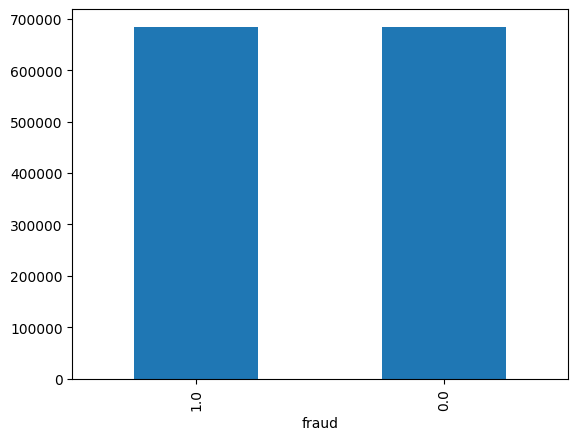

In [29]:
fraud_plt = train_over['fraud'].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [40]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228146
         1.0       0.57      0.95      0.71     21854

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [34]:
#pip install imbalanced-learn

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [37]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [38]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [39]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228146
         1.0       0.57      0.95      0.71     21854

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

